# Breast Cancer Classification using Machine Learning
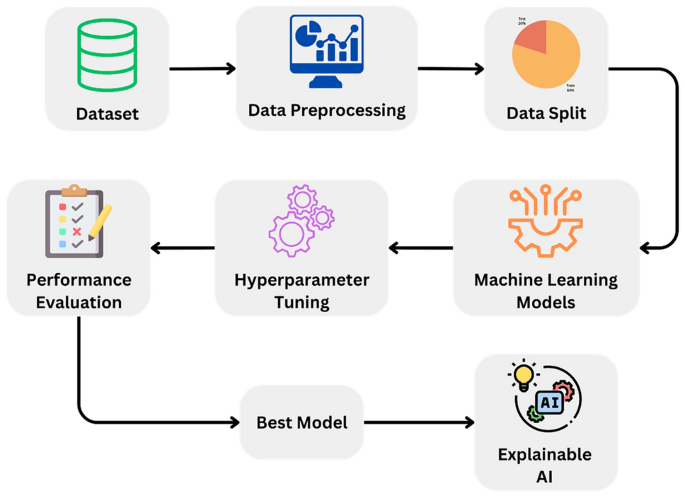

# About Dataset
**Description:**
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.   

This dataset contains features that are crucial for diagnosing breast cancer as either malignant (M) or benign (B). Below is a brief description of the columns present in the dataset:

- **id**: A unique identifier for each patient.
- **diagnosis**: The diagnosis result, where 'M' indicates malignant and 'B' indicates benign.
  
#### Mean Features:
- **radius_mean**: Mean of distances from the center to points on the perimeter of the tumor.
- **texture_mean**: Standard deviation of gray-scale values.
- **perimeter_mean**: Perimeter of the tumor.
- **area_mean**: Area of the tumor.
- **smoothness_mean**: Local variation in radius lengths.
- **compactness_mean**: Formula: (Perimeter² / Area) - 1.0.
- **concavity_mean**: Severity of concave portions of the contour.
- **concave points_mean**: Number of concave portions of the contour.
- **symmetry_mean**: Symmetry of the tumor.
- **fractal_dimension_mean**: "Coastline approximation" minus 1.

#### Standard Error Features:
- **radius_se**: Standard error of the mean of distances from the center to points on the perimeter.
- **texture_se**: Standard error of gray-scale values.
- **perimeter_se**: Standard error of the perimeter.
- **area_se**: Standard error of the area.
- **smoothness_se**: Standard error of local variation in radius lengths.
- **compactness_se**: Standard error of compactness (Perimeter² / Area) - 1.0.
- **concavity_se**: Standard error of the severity of concave portions of the contour.
- **concave points_se**: Standard error for the number of concave portions of the contour.
- **symmetry_se**: Standard error for the symmetry of the tumor.
- **fractal_dimension_se**: Standard error for the "coastline approximation" minus 1.

#### Worst (or Largest) Features:
- **radius_worst**: Largest mean value for the mean of distances from the center to points on the perimeter.
- **texture_worst**: Largest mean value for the standard deviation of gray-scale values.
- **perimeter_worst**: Largest mean value for the perimeter.
- **area_worst**: Largest mean value for the area.
- **smoothness_worst**: Largest mean value for local variation in radius lengths.
- **compactness_worst**: Largest mean value for compactness (Perimeter² / Area) - 1.0.
- **concavity_worst**: Largest mean value for the severity of concave portions of the contour.
- **concave points_worst**: Largest mean value for the number of concave portions of the contour.
- **symmetry_worst**: Largest mean value for the symmetry of the tumor.
- **fractal_dimension_worst**: Largest mean value for the "coastline approximation" minus 1.

- **Unnamed: 32**: An empty column in the dataset that can be dropped.


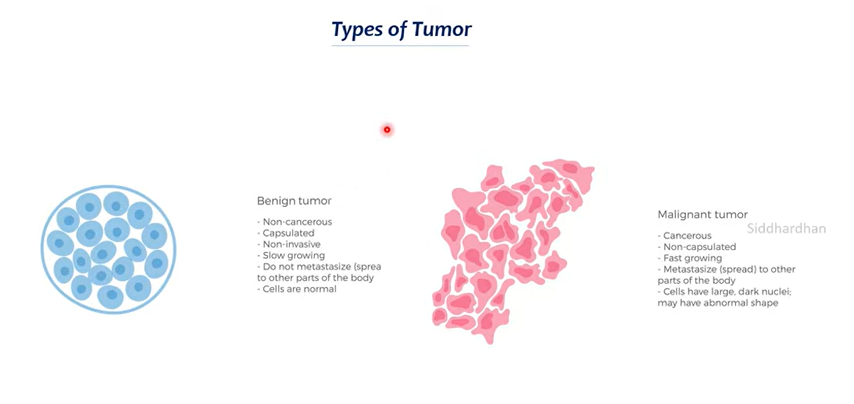

## Benign Tumors: 
### Non-cancerous growths that do not spread to other parts of the body, such as fibroadenomas.

## Malignant Tumors: 
### Cancerous tumors that can invade nearby tissues and spread to other parts of the body.

In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [650]:
import warnings
warnings.filterwarnings('ignore')

In [651]:
breast = pd.read_csv('breast cancer.csv')

In [652]:
breast.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
79,8610908,B,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,...,24.82,91.88,622.1,0.1289,0.2141,0.17310,0.07926,0.2779,0.07918,NaN
282,89122,M,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,...,28.65,152.40,1628.0,0.1518,0.3749,0.43160,0.22520,0.3590,0.07787,NaN
104,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,...,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552,NaN
323,895100,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240,NaN
543,922296,B,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,...,37.17,92.48,629.6,0.1072,0.1381,0.10620,0.07958,0.2473,0.06443,NaN


In [653]:
breast.drop('Unnamed: 32', axis=1, inplace=True)

In [654]:
breast.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Reading the dataset

In [655]:
breast.shape

(569, 32)

In [656]:
breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [657]:
breast.duplicated().sum()

np.int64(0)

In [658]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [659]:
breast.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [660]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [661]:
# Convert 'M' to 1 and 'B' to 0
breast['diagnosis'] = label_encoder.fit_transform(breast['diagnosis'])

# Now, 'diagnosis' will have 1 for 'M' and 0 for 'B'


In [662]:
breast['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [663]:
breast.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


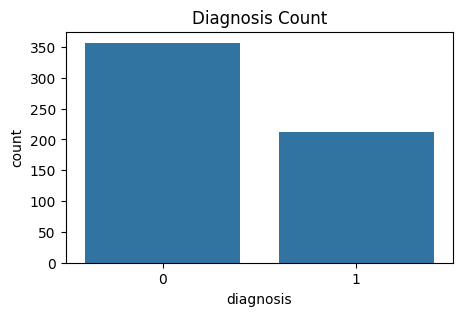

In [664]:
# Adjust the figure size
plt.figure(figsize=(5, 3))

# Create a count plot for the 'diagnosis' column
sns.countplot(x='diagnosis', data=breast)

# Set the title of the plot
plt.title('Diagnosis Count')

# Display the plot
plt.show()

In [665]:
breast.groupby(breast.diagnosis).mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


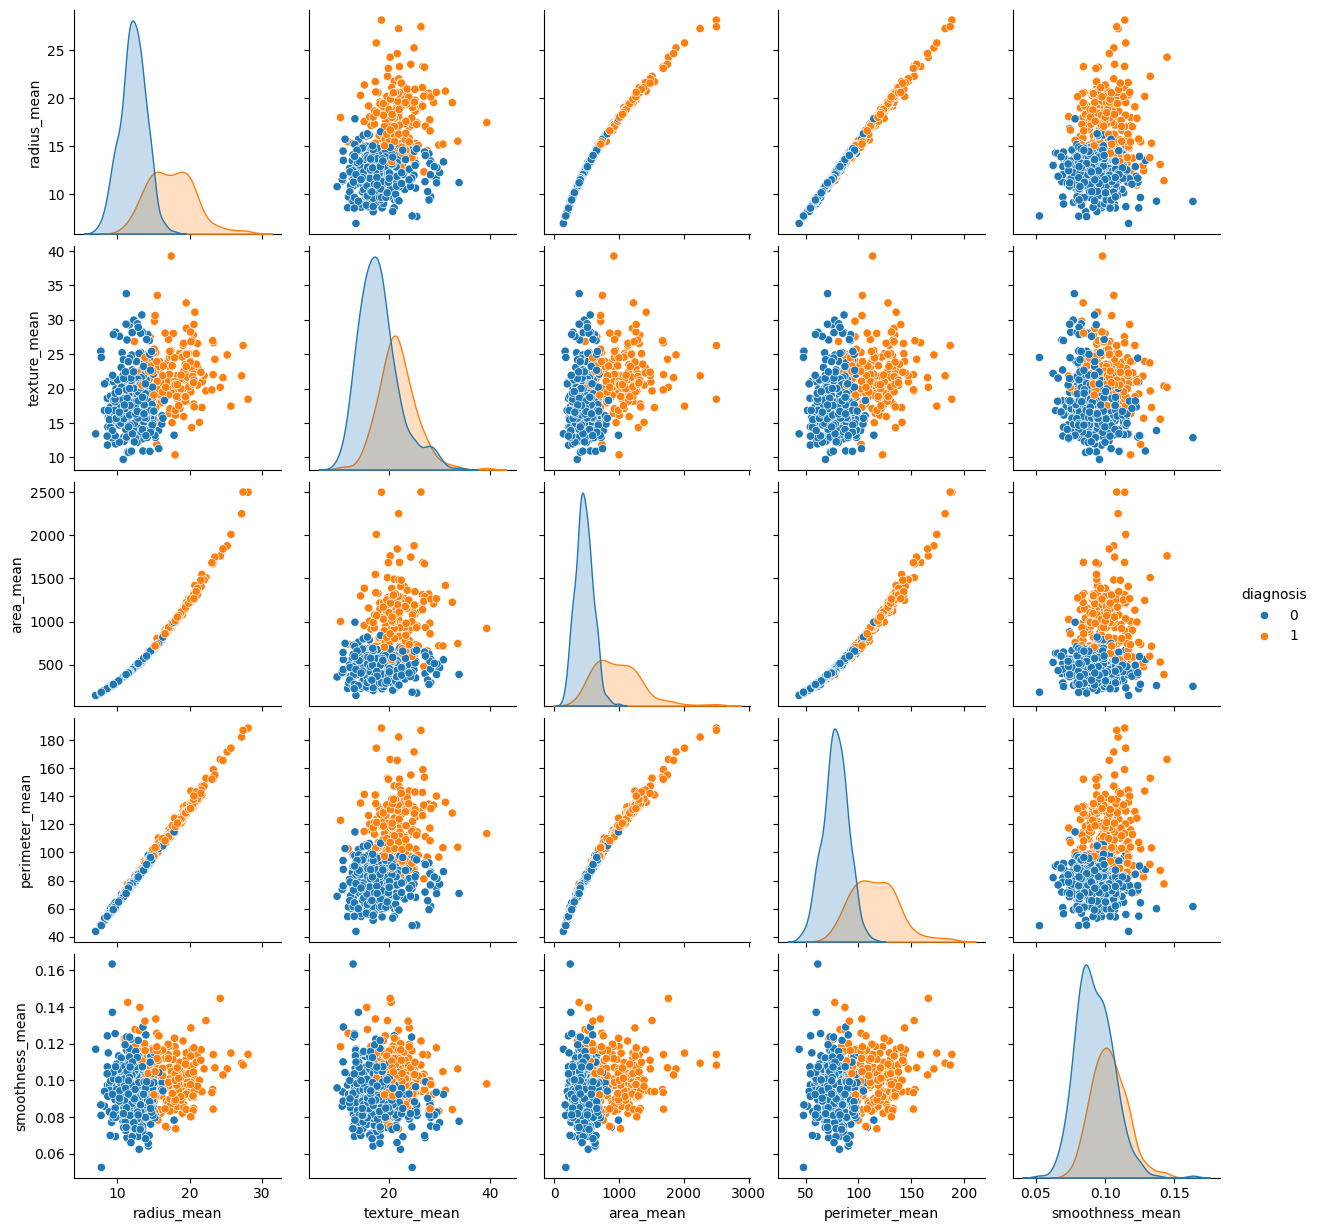

In [666]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(breast, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

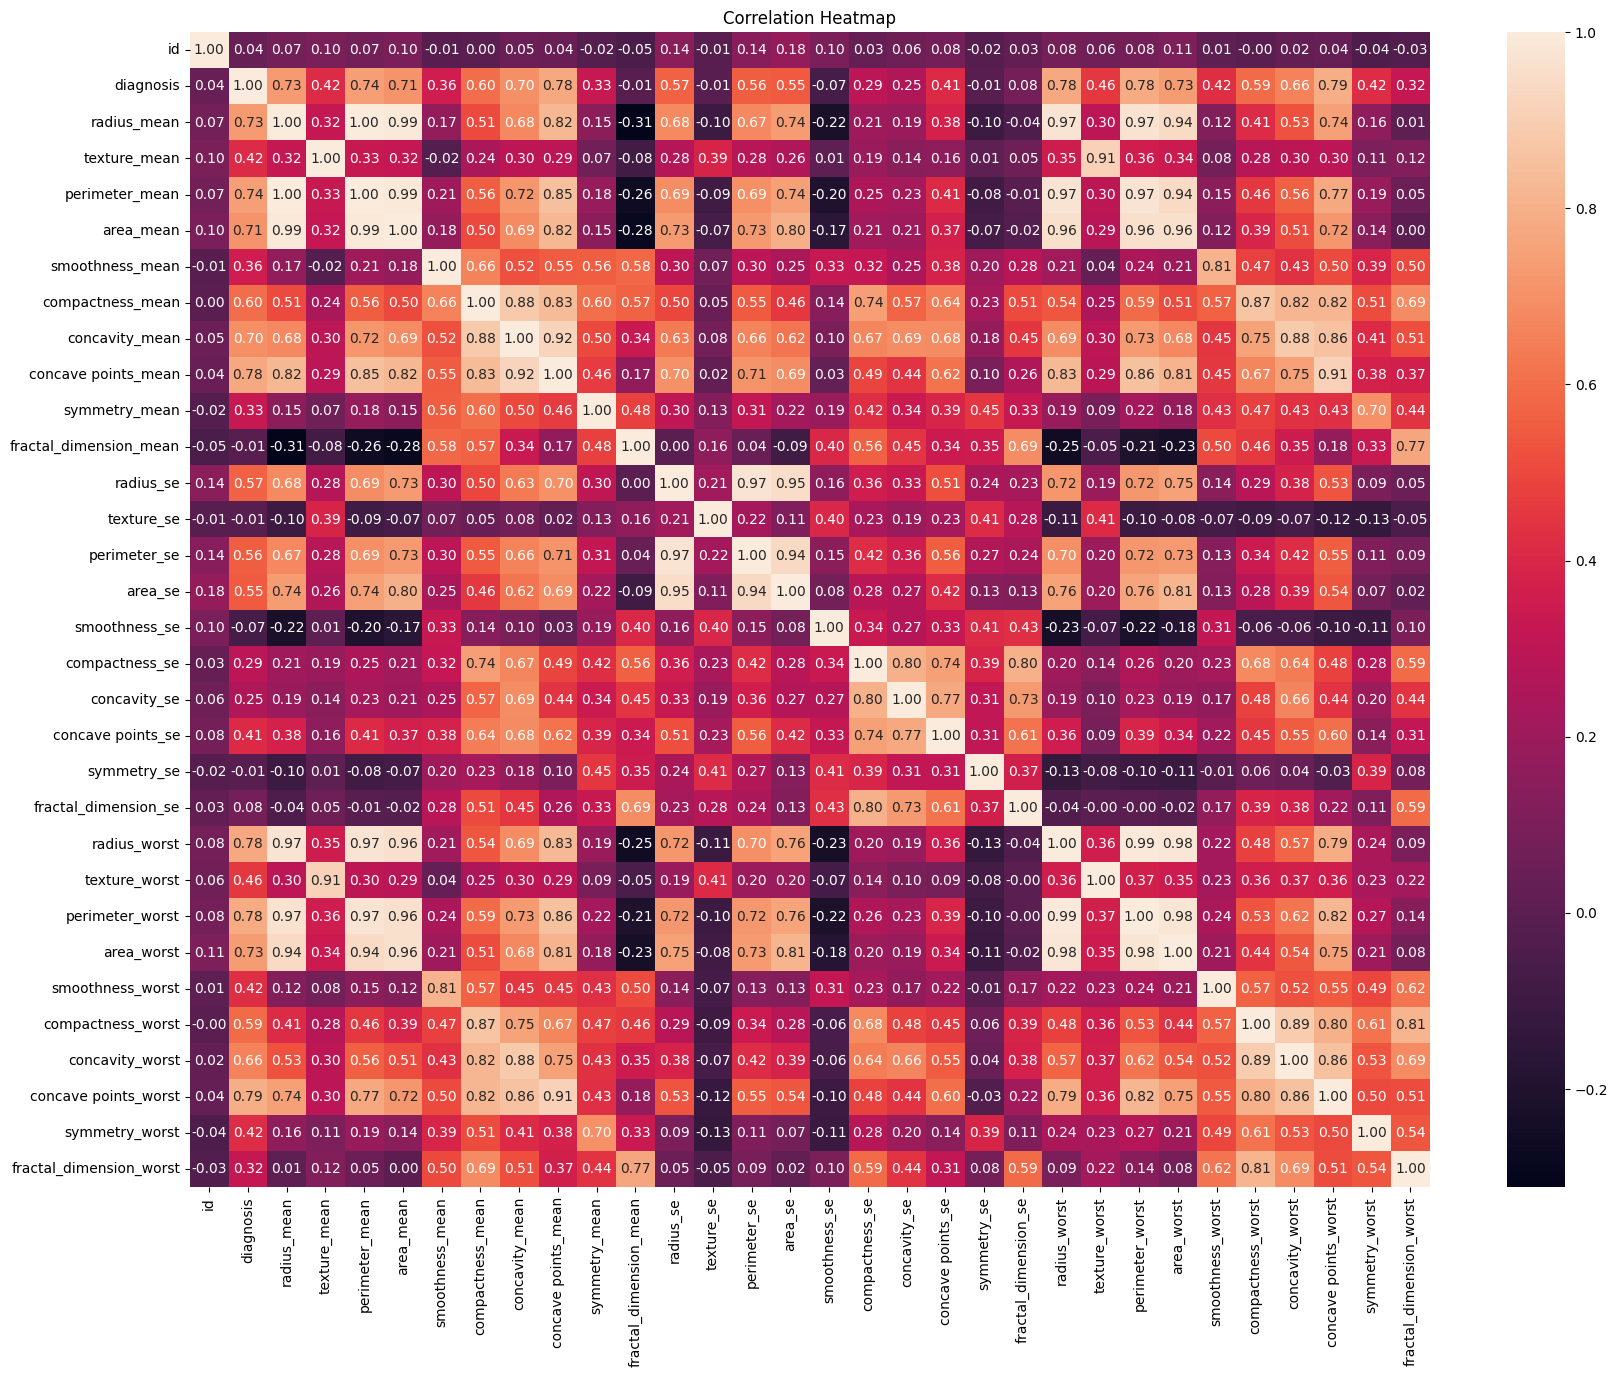

In [667]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
correlation = breast.corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Splitting the dataset

In [668]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

In [669]:
X.sample(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
493,914101,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,...,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
117,864729,14.87,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.08923,0.2157,...,18.810,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
476,911654,14.20,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.03058,0.1506,...,16.450,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858
545,922576,13.62,23.23,87.19,573.2,0.09246,0.06747,0.029740,0.02443,0.1664,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953


In [670]:
y.sample(5)

566    1
25     1
51     0
318    0
153    0
Name: diagnosis, dtype: int64

In [671]:
X.shape

(569, 31)

In [672]:
y.shape

(569,)

# Train Test Split

In [673]:
from sklearn.model_selection import train_test_split

In [674]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [675]:
y_test.shape

(114,)

In [676]:
y_train.shape

(455,)

In [677]:
X_train.shape

(455, 31)

In [678]:
X_test.shape

(114, 31)

# Feature Scaling

In [679]:
X_train

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,859471,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,873593,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,859196,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,88466802,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,858970,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,859711,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,863031,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,8910721,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,908489,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [680]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [681]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [682]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.237127,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,-0.237020,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-0.237129,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,0.424697,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-0.237131,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.237125,-1.480675,-1.066580,-1.362085,-1.157451,0.149987,0.944057,-0.035754,-0.514485,0.331474,...,-1.352920,-1.628421,-1.336108,-1.045037,-0.469795,-0.059039,-0.627221,-1.016366,-1.032028,1.376025
451,-0.237100,-0.701497,-0.200650,-0.687880,-0.682204,1.327033,-0.036619,-0.229252,-0.353247,-0.036372,...,-0.644011,0.614731,-0.647704,-0.626555,1.616328,0.085623,0.060743,0.116740,-0.156974,0.398365
452,-0.176304,0.048802,-0.555001,-0.065125,-0.061423,-2.261627,-1.466613,-1.028567,-1.105515,-1.103492,...,-0.275720,-0.806427,-0.379841,-0.339278,-1.989065,-1.307006,-1.127968,-1.239034,-0.708639,-1.271455
453,-0.236757,-0.038969,0.102073,-0.031374,-0.154780,0.737432,0.184701,0.298585,0.430059,-0.517123,...,0.167478,0.868921,0.203878,-0.013556,1.291049,0.672020,0.632532,1.050012,0.434322,1.213362


In [683]:
compare = pd.DataFrame(columns=['Algorithm', 'Training Accuracy', 'Testing Accuracy', 'F1 Score', 'Recall', 'Precision'])


# Model and Feature importance


* ## Logistic Regression 

In [684]:
LR = LogisticRegression()

In [685]:
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [686]:
accuracy_score(y_test,y_pred)

0.9824561403508771

In [687]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [688]:
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9824561403508771
F1 Score : 0.9761904761904762
Recall : 0.9534883720930233
Precision : 1.0


In [689]:
compare.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

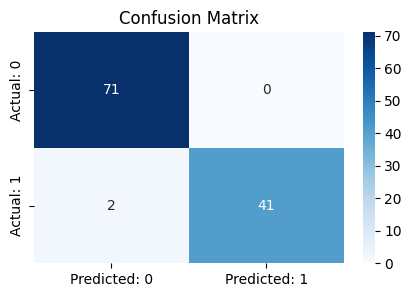

In [690]:
# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [691]:
X_train[11]

array([ 6.63966343,  1.9769275 ,  0.31327591,  1.90233452,  2.05786602,
        0.0788037 ,  0.26483378,  0.86043609,  1.76809679, -0.93595811,
       -0.85350634,  0.92729216,  0.29254864,  0.81382428,  0.88628269,
       -0.49847317, -0.26285216, -0.03032279,  0.4399518 , -1.25977636,
       -0.5802499 ,  1.96523962,  1.07854631,  1.83265153,  2.01924985,
        0.22847029,  0.37042607,  0.79030033,  1.74421993, -1.00983488,
       -0.53947146])

* ## Support Vector Machine

In [692]:
svm=SVC()

In [693]:
svm.fit(X_train,y_train)

SVC()

In [694]:
y_pred=svm.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [695]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [696]:
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.989010989010989
Testing Accuracy : 0.9824561403508771
F1 Score : 0.9761904761904762
Recall : 0.9534883720930233
Precision : 1.0


In [697]:
compare.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]

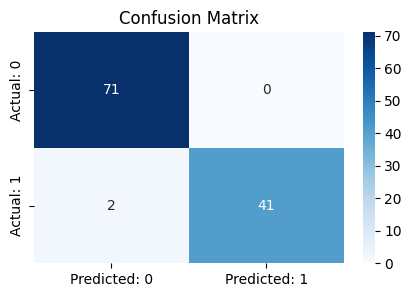

In [698]:
# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ## KNN

In [699]:
knn=KNeighborsClassifier(n_neighbors=9)

In [700]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [701]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [702]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [703]:
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9758241758241758
Testing Accuracy : 0.956140350877193
F1 Score : 0.9411764705882353
Recall : 0.9302325581395349
Precision : 0.9523809523809523


In [704]:
compare.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

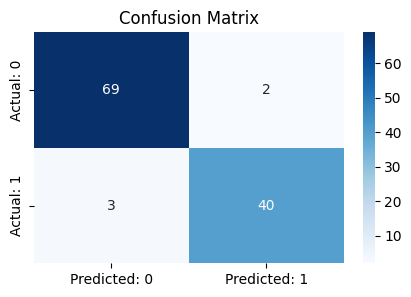

In [705]:
# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

* ## SGDClassifier

In [706]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [707]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [708]:
train_acc = sgd.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [709]:
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9523809523809523
Recall : 0.9302325581395349
Precision : 0.975609756097561


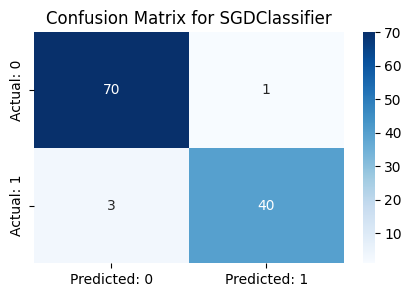

In [710]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SGDClassifier')
plt.show()

* ##  Naive Bayes

In [711]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [712]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [713]:
train_acc = nb.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [714]:
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9340659340659341
Testing Accuracy : 0.956140350877193
F1 Score : 0.9397590361445783
Recall : 0.9069767441860465
Precision : 0.975


In [715]:
compare.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]

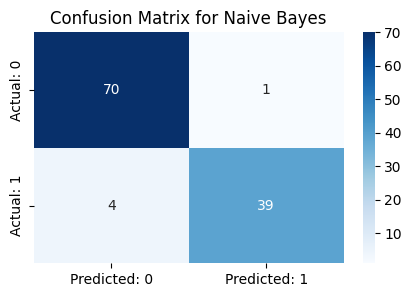

In [716]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

* ## Decision Tree

In [717]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


In [718]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91        71
           1       0.86      0.84      0.85        43

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [719]:
train_acc = dt.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)


Training Accuracy : 1.0
Testing Accuracy : 0.8859649122807017
F1 Score : 0.8470588235294118
Recall : 0.8372093023255814
Precision : 0.8571428571428571


In [720]:
compare.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

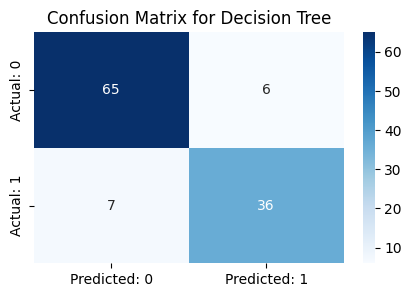

In [721]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

* ## Random Forest

In [722]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [723]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [724]:
# Compute metrics
train_acc = rf.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9523809523809523
Recall : 0.9302325581395349
Precision : 0.975609756097561


In [725]:
compare.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

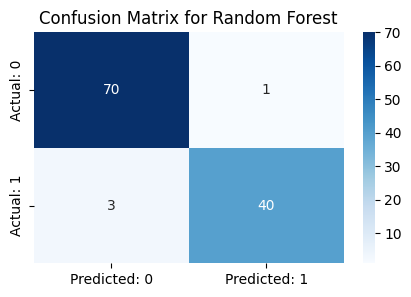

In [726]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

* ## Gradient Boosting

In [727]:
# Initialize and train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [728]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [729]:
train_acc = gb.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9473684210526315
F1 Score : 0.9285714285714286
Recall : 0.9069767441860465
Precision : 0.9512195121951219


In [730]:
compare.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

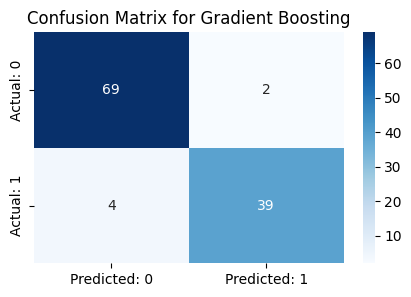

In [731]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

* ## XGBoost

In [732]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [733]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [734]:
# Compute metrics
train_acc = xgb.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.956140350877193
F1 Score : 0.9411764705882353
Recall : 0.9302325581395349
Precision : 0.9523809523809523


In [735]:
compare.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

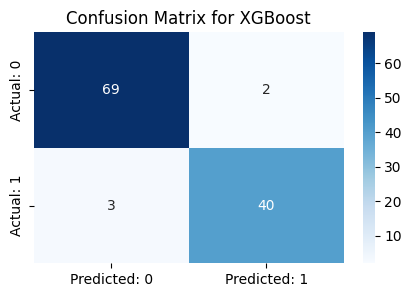

In [736]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

* ## LightGBM

In [737]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4693
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [738]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [739]:
train_acc = lgbm.score(X_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
recal = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9523809523809523
Recall : 0.9302325581395349
Precision : 0.975609756097561


In [740]:
compare.loc[9]=['LGBM', train_acc, test_acc, f1, recal, prec]

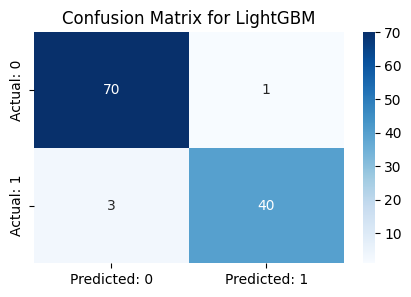

In [741]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              columns=['Predicted: 0', 'Predicted: 1'],
                              index=['Actual: 0', 'Actual: 1'])

# Plot heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for LightGBM')
plt.show()

* ## Stochastic Gradient Descent

In [742]:
SGD=SGDClassifier(loss='modified_huber', random_state=10)

In [743]:
SGD.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', random_state=10)

In [744]:
y_pred=SGD.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [745]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [746]:
train_acc=SGD.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 0.9846153846153847
Testing Accuracy : 0.9649122807017544
F1 Score : 0.9512195121951219
Recall : 0.9069767441860465
Precision : 1.0


In [747]:
compare.loc[7]=['Stochastic Gradient Descent', train_acc, test_acc, f1, recal, prec]

conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

In [748]:
compare

,Algorithm,Training Accuracy,Testing Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.986813,0.982456,0.976190,0.953488,1.000000
1,Support Vector Machine,0.989011,0.982456,0.976190,0.953488,1.000000
2,KNN,0.975824,0.956140,0.941176,0.930233,0.952381
3,Gaussian Naives Bayes,0.934066,0.956140,0.939759,0.906977,0.975000
4,Decision Tree,1.000000,0.885965,0.847059,0.837209,0.857143
5,Random forest,1.000000,0.964912,0.952381,0.930233,0.975610
6,Gradient Boosting,1.000000,0.947368,0.928571,0.906977,0.951220
8,XGBoost,1.000000,0.956140,0.941176,0.930233,0.952381
9,LGBM,1.000000,0.964912,0.952381,0.930233,0.975610
7,Stochastic Gradient Descent,0.984615,0.964912,0.951220,0.906977,1.000000


In [749]:
import pandas as pd

# Example DataFrame definition
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'KNN', 'Gaussian Naive Bayes', 
              'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 
              'LGBM', 'Stochastic Gradient Descent', 'Neural Network'],
    'Training Accuracy': [0.986813, 0.989011, 0.975824, 0.934066, 1.000000, 
                          1.000000, 1.000000, 1.000000, 1.000000, 0.984615, 0.984615],
    'Testing Accuracy': [0.982456, 0.982456, 0.956140, 0.956140, 0.877193, 
                         0.964912, 0.947368, 0.956140, 0.964912, 0.964912, 0.964912],
    'F1 Score': [0.976190, 0.976190, 0.941176, 0.939759, 0.837209, 
                 0.952381, 0.928571, 0.941176, 0.952381, 0.951220, 0.951220],
    'Recall': [0.953488, 0.953488, 0.930233, 0.906977, 0.837209, 
               0.930233, 0.906977, 0.930233, 0.930233, 0.906977, 0.906977],
    'Precision': [1.000000, 1.000000, 0.952381, 0.975000, 0.837209, 
                  0.975610, 0.951220, 0.952381, 0.975610, 1.000000, 1.000000]
})


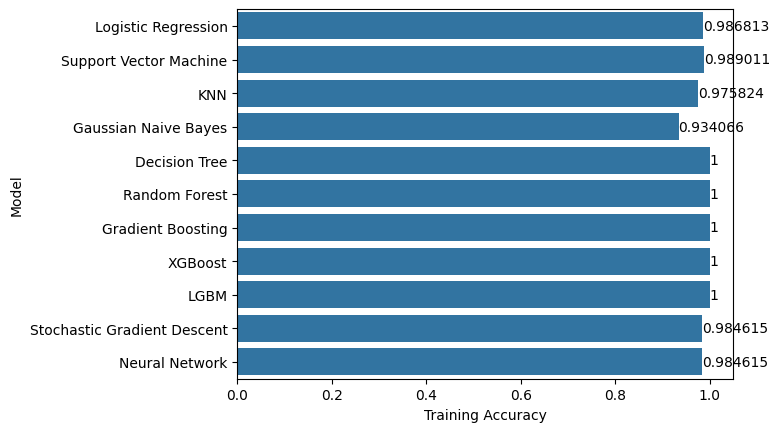

In [750]:
ax=sns.barplot(data=compare,y='Model',x='Training Accuracy')
for i in ax.containers:
    ax.bar_label(i)

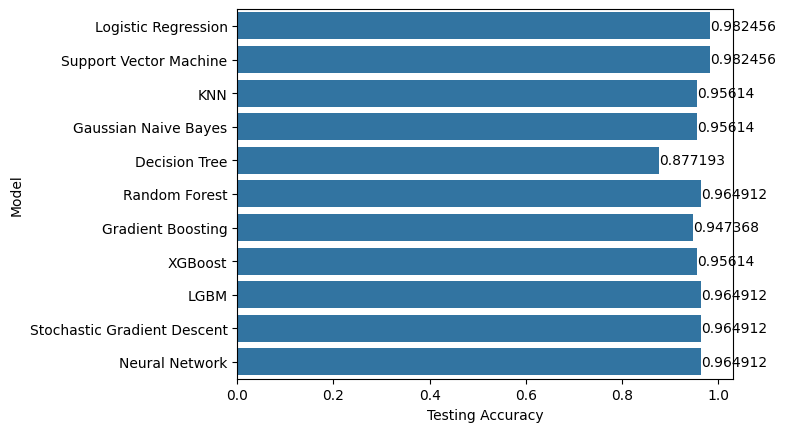

In [751]:
ax=sns.barplot(data=compare,y='Model',x='Testing Accuracy')
for i in ax.containers:
    ax.bar_label(i)

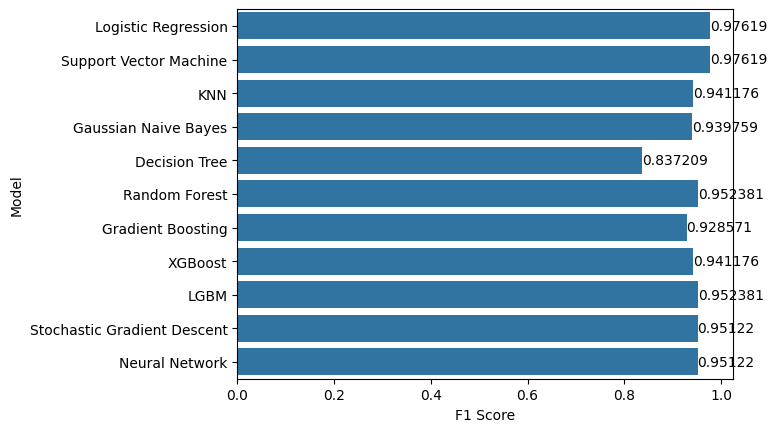

In [752]:
ax=sns.barplot(data=compare,y='Model',x='F1 Score')
for i in ax.containers:
    ax.bar_label(i)

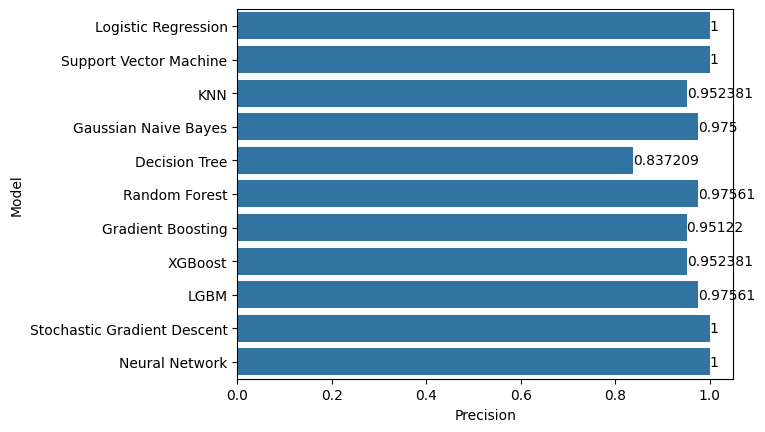

In [753]:
ax=sns.barplot(data=compare,y='Model',x='Precision')
for i in ax.containers:
    ax.bar_label(i)

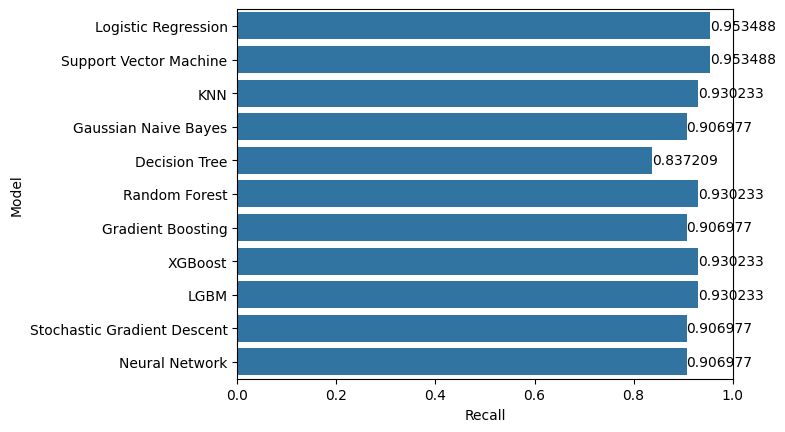

In [754]:
ax=sns.barplot(data=compare,y='Model',x='Recall')
for i in ax.containers:
    ax.bar_label(i)

# Predication System

In [755]:
input_text = (6.63966343,  1.9769275 ,  0.31327591,  1.90233452,  2.05786602,
        0.0788037 ,  0.26483378,  0.86043609,  1.76809679, -0.93595811,
       -0.85350634,  0.92729216,  0.29254864,  0.81382428,  0.88628269,
       -0.49847317, -0.26285216, -0.03032279,  0.4399518 , -1.25977636,
       -0.5802499 ,  1.96523962,  1.07854631,  1.83265153,  2.01924985,
        0.22847029,  0.37042607,  0.79030033,  1.74421993, -1.00983488,
       -0.53947146)
np_df = np.asarray(input_text)
prediciont = rf.predict(np_df.reshape(1,-1))


if prediciont[0] == 1:
    print('Cancrous')
else:
    print('Not Cancrous')


Cancrous
